# Book-Recommender-ML

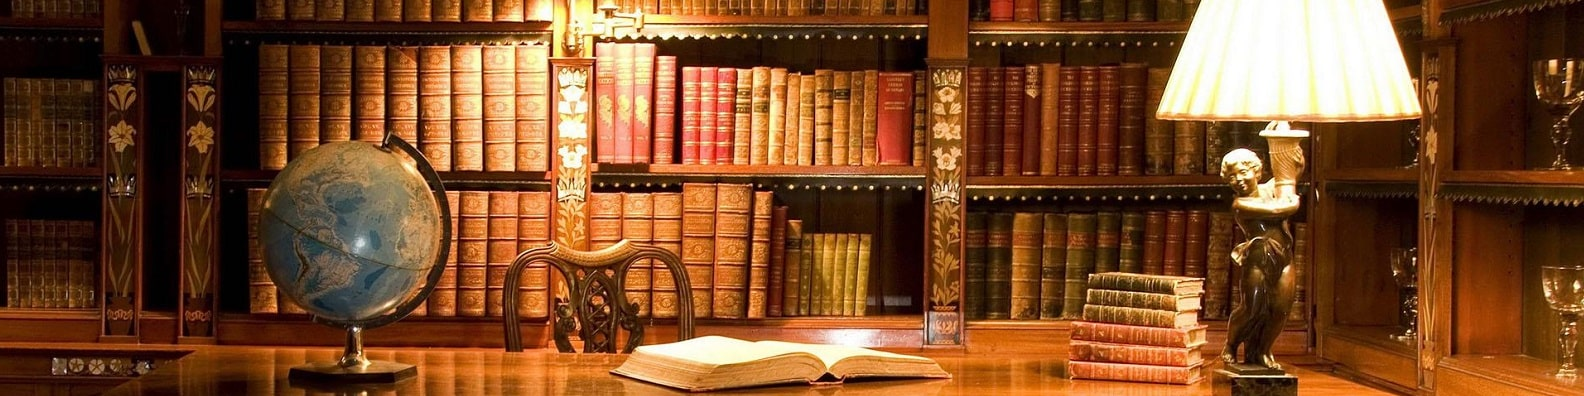

Recommendation systems are widely used today to recommend products to users based on their interests. A recommendation system is one of the strongest systems for increasing profits by retaining more users in a very big competition.It is importat to reduce large data output so that book search will be more effective compared to book search system with syntax method.

This dataset is gathered from Kaggle which is Book-Crossing: User Review/Ratings Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

##  Problem Statement 

The objective of this project is to design a recommender that will understand the interest of user's and recommend the book well suited for them & try to forecast the opion the users will have on the dissimilar substance and be able to recommends the finest items to each user.

The purpose of a book recommendation system is to predict buyer’s interest and recommend books to them accordingly. A book recommendation system can take into account many parameters like book content and book quality by filtering user reviews.

## Modeling Objective


In this project, we are supposed to design a classifier that has the ability to potentially detect the alertness of a driver given a set of features.



## How to Run the Code and Save Your Work
Option 1: Running using free online resources (1-click, recommended): The easiest way to start executing the code is to click the Run button at the top of this page and select Run on Binder. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.

Option 2: Running on your computer locally: To run the code on your computer locally, you'll need to set up Python, download the notebook and install the required libraries. Click the Run button at the top of this page, select the Run Locally option, and follow the instructions.

Saving your work: You can save a snapshot of the assignment to your Jovian profile, so that you can access it later and continue your work. Keep saving your work by running jovian.commit from time to time.

In [ ]:
!pip install jovian scikit-learn --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import jovian


In [ ]:
jovian.commit(project='python-sklearn-assignment', privacy='secret')


[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Let's begin by installing the required libraries:

In [ ]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets jovian --quiet


## Step1-Downloading Dataset

The dataset is available as a file at the following url:

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

We'll use the urlretrieve function from the module urllib.request to dowload the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krutikavinchu
Your Kaggle Key: ··········


100%|██████████| 76.1M/76.1M [00:03<00:00, 21.2MB/s]


Once the above command is executed, the dataset is downloaded and extracted to the the directory bookcrossing-dataset.



## View Dataset Files

In [ ]:
import os

In [ ]:
data_dir = './bookcrossing-dataset'

In [ ]:
os.listdir(data_dir)

['Book reviews', 'Books Data with Category Language and Summary']

In [ ]:
data_dir1 = './bookcrossing-dataset/Book reviews/Book reviews'

In [ ]:
os.listdir(data_dir1)

['BX_Books.csv', 'BX-Book-Ratings.csv', 'BX-Users.csv']

In [ ]:
data_dir2 = './bookcrossing-dataset/Books Data with Category Language and Summary'

In [ ]:
os.listdir(data_dir2)

['Preprocessed_data.csv']

In [ ]:
train_csv = data_dir1 + '/BX_Books.csv'

converting name of file BX_Books.csv to book_data_fixed.csv for better understanding.

In [ ]:
import html
with open('./bookcrossing-dataset/Book reviews/Book reviews/BX_Books.csv', 'r', encoding='latin-1') as f, open('book_data_fixed.csv', 'w') as g:
    content = html.unescape(f.read())
    g.write(content)

Let's open some rows from book_data_fixed.csv using head() function

In [ ]:
book_data = pd.read_csv('book_data_fixed.csv', skipinitialspace = True, sep=';', quotechar = '"', escapechar = '\\')
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


same like above showing some of the rows from other two files that are BX_Users.csv & BX-Book-Ratings.csv

In [ ]:
book_users_data = pd.read_csv('./bookcrossing-dataset/Book reviews/Book reviews/BX-Users.csv', sep= ';', encoding= 'latin-1')
book_users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
book_rating_data = pd.read_csv('./bookcrossing-dataset/Book reviews/Book reviews/BX-Book-Ratings.csv', sep= ';', encoding= 'latin-1')
book_users_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


finding out the rows and colums of each dataframe using shape attribute

In [ ]:
book_data.shape

(271379, 8)

In [ ]:
book_users_data.shape

(278858, 3)

In [ ]:
book_rating_data.shape

(1149780, 3)

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200


In [ ]:
import jovian
jovian.commit()


[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
